<a href="https://colab.research.google.com/github/kokot123-dev/MISP/blob/main/zaj4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pulp

!sudo apt-get install coinor-cbc glpk-utils coinor-clp

     |████████████████████████████████| 40.6MB 109kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  coinor-libcbc3 coinor-libcgl1 coinor-libclp1 coinor-libcoinutils3v5
  coinor-libosi1v5 libamd2 libcolamd2 libglpk40 libsuitesparseconfig5
Suggested packages:
  libiodbc2-dev default-libmysqlclient-dev
The following NEW packages will be installed:
  coinor-cbc coinor-clp coinor-libcbc3 coinor-libcgl1 coinor-libclp1
  coinor-libcoinutils3v5 coinor-libosi1v5 glpk-utils libamd2 libcolamd2
  libglpk40 libsuitesparseconfig5
0 upgraded, 12 newly installed, 0 to remove and 14 not upgraded.
Need to get 3,439 kB of archives.
After this operation, 9,832 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsuitesparseconfig5 amd64 1:5.1.2-2 [9,044 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libamd2 amd64 1:5.1.2-2 [19.5 kB]
Get:3 

# **PROBLEM**

Producent planuje produkcje okien. Produkowane są dwa typy drewniane i aluminiowe. Na pojedyńczej partii drewnianych producent zarabia 5000 zł a na aluminiowych 3000 zł. Okna mogą być prodykowane w 3 fabrykach. Fabryka F1 produkuje tylko okna aluminiowe, z prędkościa 1 partię na godzinę. Fabryka jest dostępna 4h w tygodniu. Fabryka F2 produkuje tylko okna drewniane, z prędkością 1 partię na 2 godziny. Jest dostepna 12h w tygodniu. Fabryka F3 produkuje oba typy okien. Okna aluminiowe są produkowane z prędkością 1 partie na 2 godziny, drewniane 1 partie na 3 godziny. Jest dostępna 18h w tygodniu.

Jak powinien dobrać produkcję producent aby zmaksymalizować zysk?


# Kroki analizowania problemu
Identyfikacja zmiennych decyzyjnych

Określenie funkcji celu

Określenie ograniczeń 

Rozwiązanie problemu


**Zmienne decyzyjne**

Ilość partii okien aluminiowych x1, Ilość partii okien drewnianych x2

**Funkcja celu**

Maksymalizacja zysku

3.0 * (x1) + 5.0*  (x2)

**Ograniczenia** 

wydajność fabryk f1, f2, f3

3.0 * x1 + 2.0 * x2 <= 18

1.0 * x1 <= 4.0

2.0 * x2 <= 12.0

x1>=0 x2>=0

# Rozwiązanie graficzne

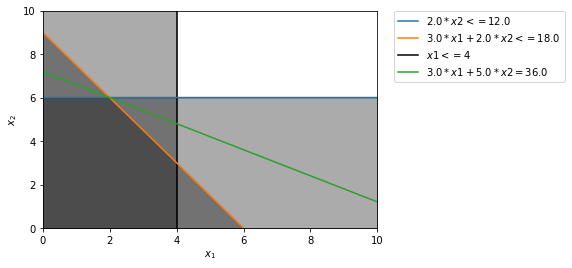

In [84]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


x = np.linspace(0, 10, 2000)


y1 = 0*x +6
y2=(18-3*x)/2
y3=(-3*x+36)/5
y4 = 0*x +1000
# Make plot

plt.plot(x, y1,label=r'$2.0*x2 <= 12.0$' )
plt.plot(x, y2,label=r'$3.0*x1 + 2.0*x2 <= 18.0$ ')
plt.plot(x, y4,color='black',label=r'$x1<=4$ ')
plt.plot(x, y3,label=r'$3.0*x1 + 5.0*x2 = 36.0$ ')

plt.xlim((0, 10))
plt.ylim((0, 10))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

plt.vlines(4,0,10)
# Fill feasible region
y5 = np.maximum(y1, 0)
y6 = np.maximum(y2, 0)

plt.fill_between(x,0, y6, color='black', alpha=0.33)
plt.fill_between(x,0, y5, color='black', alpha=0.33)
plt.fill_betweenx(x,4,0 , color='black', alpha=0.33)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

najciemniejszy obszar, to obszar spełniający wszystkie ograniczenia 
tj. obszar dopuszczalnych rozwiązań

linia zielona to jedno z możliwych rozwiązań w zależności od Z, dla Z = 36 w tym przypadku jest to wierzchołek obszaru 


# Rozwiązanie problemu za pomocą biblioteki pulp

In [76]:
from pulp import *
prob = LpProblem("Problem3",LpMaximize)

x1=LpVariable("aluminium",0)
x2=LpVariable("drewno",0)

prob += 3.0*(x1) + 5.0*(x2), "Total zysk"

prob += 3.0*x1 + 2.0*x2 <= 18.0, "F3Requirement"
prob += 1.0*x1 <= 4.0, "F1Requirement"
prob += 2.0*x2 <= 12.0, "F2Requirement"


prob.writeLP("Problem3.lp")
prob.solve()
print("Status:", LpStatus[prob.status])
print("Zysk = ", value(prob.objective))
print("Wyprodukowano:")

for v in prob.variables():
   print(v.name, "=", v.varValue, "partie")

#!cat "Problem3.lp"

Status: Optimal
Zysk =  36.0
Wyprodukowano:
aluminium = 2.0 partie
drewno = 6.0 partie


# Wersja z suwakami

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, FloatSlider, IntSlider
import ipywidgets as widgets
import pandas as pd

style = {'description_width': 'initial'}


alu_slider = FloatSlider(min=0,max = 10, value= 3.0, step = 1.0, description="aluminium_zysk", style= style )
dre_slider = FloatSlider(min=0,max = 10, value= 5.0, step = 1.0, description="drewno_zysk", style= style )
czas_alu_F1_slider = FloatSlider(min=0,max = 9, value= 1, step = 1.0, description="czas_produkcji_alu_F1", style= style )
czas_dre_F2_slider = FloatSlider(min=0,max = 9, value= 2, step = 1.0, description="czas_produkcji_dre_F2", style= style )
czas_alu_F3_slider = FloatSlider(min=0,max = 9, value= 3, step = 1.0, description="czas_produkcji_alu_F3", style= style )
czas_dre_F3_slider = FloatSlider(min=0,max = 9, value= 2, step = 1.0, description="czas_produkcji_dre_F3", style= style )
max_F1_slider = FloatSlider(min=0,max = 30, value=  4, step = 1.0, description="F1_dostepnosc", style= style )
max_F2_slider = FloatSlider(min=0,max = 30, value= 12, step = 1.0, description="F2_dostepnosc", style= style )
max_F3_slider = FloatSlider(min=0,max = 30, value= 18, step = 1.0, description="F3_dostepnosc", style= style )


def hurt_produkcja(alu = 3.0,
    dre = 5.0,
    czas_alu_F1=1,
    czas_alu_F3=3,
    czas_dre_F2=2,
    czas_dre_F3=2,
    max_F1=4,
    max_F2=12,
    max_F3=18):
    
    prob = LpProblem("Problem4",LpMaximize)

    x1=LpVariable("aluminium",0)
    x2=LpVariable("drewno",0)

    prob += alu*(x1) + dre*(x2), "Total zysk"

    prob += czas_alu_F3*x1 + czas_dre_F3*x2 <= max_F3, "F3Requirement"
    prob += czas_alu_F1*x1 <= max_F1, "F1Requirement"
    prob += czas_dre_F2*x2 <= max_F2, "F2Requirement"

    
    prob.solve()
    # The status of the solution is printed to the screen
    print("Status:", LpStatus[prob.status])
    # Each of the variables is printed with it's resolved optimum value
    for v in prob.variables():
        print(v.name, "=", v.varValue)
    print("Zysk wyniesie {} zł  ".format( value(prob.objective)))
    
    shadows = [{'name':name, 'shadow price': c.pi, "slack": c.slack} for name, c in prob.constraints.items()]
    print("*"*10+"Shadow Prices"+"*"*10)
    print(pd.DataFrame(shadows))
    
    
interact(hurt_produkcja,
    alu = alu_slider,
    dre = dre_slider,
    czas_alu_F1 = czas_alu_F1_slider,
    czas_dre_F2 = czas_dre_F2_slider,
    czas_alu_F3 = czas_alu_F3_slider,
    czas_dre_F3 = czas_dre_F3_slider,
    max_F1 = max_F1_slider,
    max_F2 = max_F2_slider,
    max_F3 = max_F3_slider)

interactive(children=(FloatSlider(value=3.0, description='aluminium_zysk', max=10.0, step=1.0, style=SliderSty…

<function __main__.hurt_produkcja>